<a href="https://colab.research.google.com/github/ahmet-kemal-ates/data-driven-ESS-model/blob/main/15-Dec-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
print(os.listdir('./'))  # List files in the current directory
print(os.listdir('./Models'))  # List files in the Models directory


['.config', 'Models', 'Models.zip', 'TrainingSet_NASA_Fri Apr 19 14-22-06 2019_Matlab.mat', 'ENNC.py', 'main_Train.py', 'TrainingSet_NASA_Fri Apr 19 14-27-45 2019_Matlab.mat', 'sample_data']
['Models']


In [18]:
import zipfile
import os

# Extract Models.zip
with zipfile.ZipFile('./Models.zip', 'r') as zip_ref:
    zip_ref.extractall('./Models')

# Verify extraction
print("Extracted files:", os.listdir('./Models'))


Extracted files: ['Models']


In [20]:
import os
print(os.listdir('./Models'))  # Check contents of the Models folder
print(os.listdir('./Models/Models'))  # Check contents of the nested Models folder


['Models']
['TrainingSet_NASA_Fri Apr 19 14-27-45 2019.json', 'TrainingSet_NASA_Fri Apr 19 14-27-45 2019_Weights.h5', 'TrainingSet_NASA_Fri Apr 19 14-22-06 2019_Matlab.mat', 'TrainingSet_NASA_Fri Apr 19 14-22-06 2019.json', 'TrainingSet_NASA_Fri Apr 19 14-27-45 2019_Matlab.mat', 'TrainingSet_NASA_Fri Apr 19 14-22-06 2019_Weights.h5']


In [21]:
from scipy.io import loadmat

# Correct file path to the MATLAB file
mat_data = loadmat('./Models/Models/TrainingSet_NASA_Fri Apr 19 14-22-06 2019_Matlab.mat')

# Check the structure of the loaded data
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'log', 'maxInputVTr', 'minInputVTr', 'maxInputITr', 'tr_Time', 'tr_Iin', 'tr_SoC', 'tr_Vout', 'tr_Temp', 'ts_Time', 'ts_Iin', 'ts_SoC', 'ts_Vout', 'ts_Temp', 'inputTr_Iin', 'inputTr_SoC', 'inputTr_Temp', 'inputTs_Iin', 'inputTs_SoC', 'inputTs_Temp', 'Vout_train', 'Vout_test', 'Vqst_train', 'Vist_train', 'Vdyn_train', 'Vdyns_train', 'Vqst_test', 'Vist_test', 'Vdyn_test', 'Vdyns_test', 'Rist_train', 'Rist_test', 'Rdyn_train', 'Rdyn_test', 'tauDyn_train', 'tauDyn_test', 'netWeights', 'mse_train', 'mse_test', 'trainingTime', 'lossHistory'])


In [22]:
print(mat_data['tr_Iin'].shape)  # Check the shape of training input current
print(mat_data['tr_Iin'])  # Display values of training input current


(24090, 1)
[[-0.        ]
 [-0.30265249]
 [-0.30236207]
 ...
 [-0.15125969]
 [-0.15125969]
 [-0.15125969]]


In [23]:
# Training data inspection
print("State of Charge (SoC):", mat_data['tr_SoC'].shape)
print(mat_data['tr_SoC'])

print("Temperature (Temp):", mat_data['tr_Temp'].shape)
print(mat_data['tr_Temp'])

print("Output Voltage (Vout):", mat_data['tr_Vout'].shape)
print(mat_data['tr_Vout'])

# Test data inspection
print("Test Output Voltage (Vout):", mat_data['ts_Vout'].shape)
print(mat_data['ts_Vout'])


State of Charge (SoC): (24090, 1)
[[1.        ]
 [0.9998015 ]
 [0.99960319]
 ...
 [0.15315914]
 [0.15305994]
 [0.15296073]]
Temperature (Temp): (24090, 1)
[[0.37936167]
 [0.37936167]
 [0.37936167]
 ...
 [0.56890227]
 [0.56888167]
 [0.56863474]]
Output Voltage (Vout): (24090, 1)
[[0.95363636]
 [0.831     ]
 [0.82858182]
 ...
 [0.43      ]
 [0.43      ]
 [0.43      ]]
Test Output Voltage (Vout): (21031, 1)
[[0.95363636]
 [0.96537511]
 [0.95919682]
 ...
 [0.22181818]
 [0.22181818]
 [0.22110795]]


In [24]:
import numpy as np

# Combine features for training and testing
X_train = np.hstack([mat_data['tr_Iin'], mat_data['tr_SoC'], mat_data['tr_Temp']])
y_train = mat_data['tr_Vout']  # Training targets

X_test = np.hstack([mat_data['ts_Iin'], mat_data['ts_SoC'], mat_data['ts_Temp']])
y_test = mat_data['ts_Vout']  # Testing targets

# Print shapes to verify data
print("Training Input Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Input Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)


Training Input Shape: (24090, 3)
Training Target Shape: (24090, 1)
Testing Input Shape: (21031, 3)
Testing Target Shape: (21031, 1)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer with 3 features
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(1)  # Output layer predicting Vout
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_test, y_test),  # Validation data
    epochs=50,  # Number of epochs
    batch_size=32  # Batch size
)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Mean Absolute Error (MAE):", mae)


Epoch 1/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0213 - mae: 0.0756 - val_loss: 0.0028 - val_mae: 0.0424
Epoch 2/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0016 - mae: 0.0292 - val_loss: 0.0021 - val_mae: 0.0367
Epoch 3/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0013 - mae: 0.0265 - val_loss: 0.0018 - val_mae: 0.0322
Epoch 4/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 0.0018 - val_mae: 0.0332
Epoch 5/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 0.0019 - val_mae: 0.0339
Epoch 6/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012 - mae: 0.0253 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 7/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0010 - mae: 0.0235 - val_loss: 0.0019 - val_mae: 0.0332
Epoch 8/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.3712e-04 - mae: 0.0223 - val_loss: 0.0017 - val_mae: 0.0324
Epoch 9/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step 

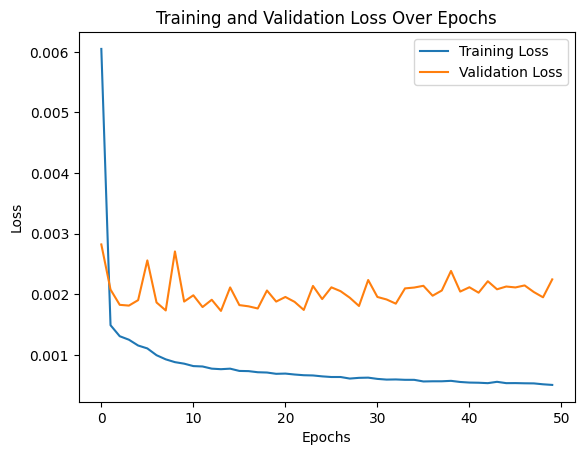

In [27]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()


658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


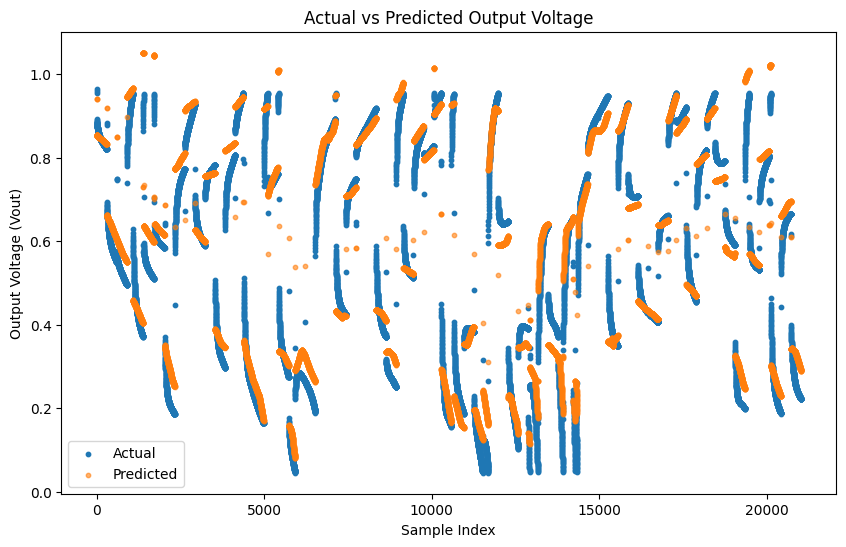

In [28]:
# Predict on the test set
y_pred = model.predict(X_test)

# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', s=10)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', s=10, alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Output Voltage (Vout)')
plt.legend()
plt.title('Actual vs Predicted Output Voltage')
plt.show()


In [29]:
from scipy.io import loadmat

# Load the first dataset
first_mat_data = loadmat('TrainingSet_NASA_Fri Apr 19 14-22-06 2019_Matlab.mat')

# Load the second dataset
second_mat_data = loadmat('TrainingSet_NASA_Fri Apr 19 14-27-45 2019_Matlab.mat')

# Print the keys of both datasets to verify successful loading
print("First Dataset Keys:", first_mat_data.keys())
print("Second Dataset Keys:", second_mat_data.keys())


First Dataset Keys: dict_keys(['__header__', '__version__', '__globals__', 'log', 'maxInputVTr', 'minInputVTr', 'maxInputITr', 'tr_Time', 'tr_Iin', 'tr_SoC', 'tr_Vout', 'tr_Temp', 'ts_Time', 'ts_Iin', 'ts_SoC', 'ts_Vout', 'ts_Temp', 'inputTr_Iin', 'inputTr_SoC', 'inputTr_Temp', 'inputTs_Iin', 'inputTs_SoC', 'inputTs_Temp', 'Vout_train', 'Vout_test', 'Vqst_train', 'Vist_train', 'Vdyn_train', 'Vdyns_train', 'Vqst_test', 'Vist_test', 'Vdyn_test', 'Vdyns_test', 'Rist_train', 'Rist_test', 'Rdyn_train', 'Rdyn_test', 'tauDyn_train', 'tauDyn_test', 'netWeights', 'mse_train', 'mse_test', 'trainingTime', 'lossHistory'])
Second Dataset Keys: dict_keys(['__header__', '__version__', '__globals__', 'log', 'maxInputVTr', 'minInputVTr', 'maxInputITr', 'tr_Time', 'tr_Iin', 'tr_SoC', 'tr_Vout', 'tr_Temp', 'ts_Time', 'ts_Iin', 'ts_SoC', 'ts_Vout', 'ts_Temp', 'inputTr_Iin', 'inputTr_SoC', 'inputTr_Temp', 'inputTs_Iin', 'inputTs_SoC', 'inputTs_Temp', 'Vout_train', 'Vout_test', 'Vqst_train', 'Vist_train', '

In [30]:
import numpy as np

# Extract data from the first dataset
X_train_1 = np.hstack([first_mat_data['tr_Iin'], first_mat_data['tr_SoC'], first_mat_data['tr_Temp']])
y_train_1 = first_mat_data['tr_Vout']

X_test_1 = np.hstack([first_mat_data['ts_Iin'], first_mat_data['ts_SoC'], first_mat_data['ts_Temp']])
y_test_1 = first_mat_data['ts_Vout']

# Extract data from the second dataset
X_train_2 = np.hstack([second_mat_data['tr_Iin'], second_mat_data['tr_SoC'], second_mat_data['tr_Temp']])
y_train_2 = second_mat_data['tr_Vout']

X_test_2 = np.hstack([second_mat_data['ts_Iin'], second_mat_data['ts_SoC'], second_mat_data['ts_Temp']])
y_test_2 = second_mat_data['ts_Vout']

# Print shapes to confirm successful extraction
print("First Dataset - Training Input Shape:", X_train_1.shape)
print("First Dataset - Training Target Shape:", y_train_1.shape)
print("Second Dataset - Training Input Shape:", X_train_2.shape)
print("Second Dataset - Training Target Shape:", y_train_2.shape)
print("First Dataset - Testing Input Shape:", X_test_1.shape)
print("First Dataset - Testing Target Shape:", y_test_1.shape)
print("Second Dataset - Testing Input Shape:", X_test_2.shape)
print("Second Dataset - Testing Target Shape:", y_test_2.shape)


First Dataset - Training Input Shape: (24090, 3)
First Dataset - Training Target Shape: (24090, 1)
Second Dataset - Training Input Shape: (24090, 3)
Second Dataset - Training Target Shape: (24090, 1)
First Dataset - Testing Input Shape: (21031, 3)
First Dataset - Testing Target Shape: (21031, 1)
Second Dataset - Testing Input Shape: (21031, 3)
Second Dataset - Testing Target Shape: (21031, 1)


In [31]:
# Combine training data from both datasets
X_train_combined = np.vstack([X_train_1, X_train_2])
y_train_combined = np.vstack([y_train_1, y_train_2])

# Combine testing data from both datasets
X_test_combined = np.vstack([X_test_1, X_test_2])
y_test_combined = np.vstack([y_test_1, y_test_2])

# Print shapes to confirm combined data
print("Combined Training Input Shape:", X_train_combined.shape)
print("Combined Training Target Shape:", y_train_combined.shape)
print("Combined Testing Input Shape:", X_test_combined.shape)
print("Combined Testing Target Shape:", y_test_combined.shape)


Combined Training Input Shape: (48180, 3)
Combined Training Target Shape: (48180, 1)
Combined Testing Input Shape: (42062, 3)
Combined Testing Target Shape: (42062, 1)


In [32]:
# Retrain the model using the combined dataset
history_combined = model.fit(
    X_train_combined, y_train_combined,  # Combined training data
    validation_data=(X_test_combined, y_test_combined),  # Combined testing data
    epochs=50,  # Number of epochs
    batch_size=32  # Batch size
)

# Evaluate the retrained model on the combined testing data
loss_combined, mae_combined = model.evaluate(X_test_combined, y_test_combined)
print("Test Loss (Combined Dataset):", loss_combined)
print("Test Mean Absolute Error (MAE) (Combined Dataset):", mae_combined)


Epoch 1/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 5.1034e-04 - mae: 0.0158 - val_loss: 0.0021 - val_mae: 0.0360
Epoch 2/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.0635e-04 - mae: 0.0156 - val_loss: 0.0019 - val_mae: 0.0340
Epoch 3/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.8924e-04 - mae: 0.0152 - val_loss: 0.0021 - val_mae: 0.0368
Epoch 4/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.8218e-04 - mae: 0.0151 - val_loss: 0.0022 - val_mae: 0.0374
Epoch 5/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 4.9422e-04 - mae: 0.0155 - val_loss: 0.0020 - val_mae: 0.0355
Epoch 6/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9416e-04 - mae: 0.0153 - val_loss: 0.0021 - val_mae: 0.0359
Epoch 7/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.8173e-04 - mae: 0.0151 - val_loss: 0.0022 - val_mae: 0.0373
Epoch 8/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.7246e-04 - mae: 0.0150 - val_loss: 0.0024 - val_mae: 0.0394
Epoch 9

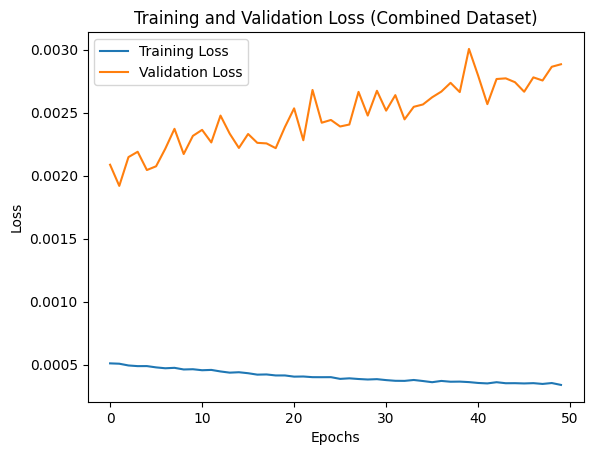

In [33]:
import matplotlib.pyplot as plt

# Plot training and validation loss for the combined dataset
plt.plot(history_combined.history['loss'], label='Training Loss')
plt.plot(history_combined.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Combined Dataset)')
plt.show()


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


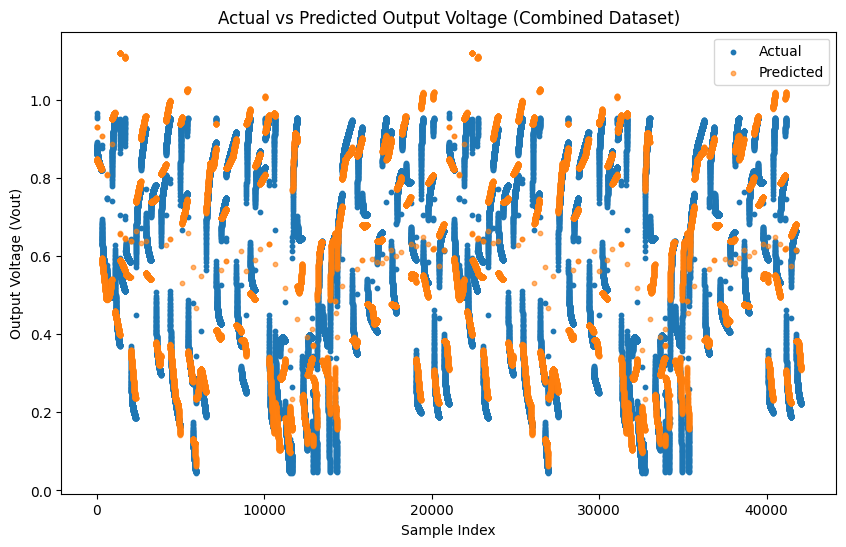

In [34]:
# Predict on the combined test set
y_pred_combined = model.predict(X_test_combined)

# Plot actual vs predicted values for the combined dataset
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_combined)), y_test_combined, label='Actual', s=10)
plt.scatter(range(len(y_pred_combined)), y_pred_combined, label='Predicted', s=10, alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Output Voltage (Vout)')
plt.legend()
plt.title('Actual vs Predicted Output Voltage (Combined Dataset)')
plt.show()


In [37]:
# Save the model in Keras format
model.save('retrained_ennc_model_combined.keras')

print("Retrained model saved as 'retrained_ennc_model_combined.keras'")


Retrained model saved as 'retrained_ennc_model_combined.keras'


In [38]:
from google.colab import files

# Download the saved Keras model file
files.download('retrained_ennc_model_combined.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>